In [5]:
import pandas as pd


In [7]:
df = pd.read_csv('superstore_dataset2011-2015.csv', encoding='ISO-8859-1')


In [8]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [11]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [13]:
# Data dimensions
print(f'Data Dimensions: {df.shape}')

# Data types
print(f'Data Types:\n{df.dtypes}')

# Summary statistics
print(f'Summary Statistics:\n{df.describe()}')

# Check for missing values
print(f'Missing Values:\n{df.isnull().sum()}')


Data Dimensions: (51290, 24)
Data Types:
Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object
Summary Statistics:
            Row ID   Postal Code         Sales      Quantity      Discount  \
count  51290.00000   9994.000000  51290.000000  51290.000000  51290.000000   
mean   25645.50000  55190.379428    246.490581      3.476545      0.142908   
std    14806.29199  32063.693350    487.565361      2.278766      0

In [14]:
#  Date conversion
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


/tmp/ipykernel_102/3941332911.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
/tmp/ipykernel_102/3941332911.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [17]:
categorical_columns = ['Market', 'Segment', 'Order Priority']
for col in categorical_columns:
    df[col] = df[col].astype('category')


In [19]:
df.drop(columns=['Postal Code'], inplace=True)


In [21]:
from scipy.stats import zscore

numerical_columns = ['Sales', 'Profit', 'Shipping Cost']
for col in numerical_columns:
    df[f'{col}_Zscore'] = zscore(df[col])

# You can then filter out the outliers if needed:
# df = df[(df['Sales_Zscore'] < 3) & (df['Profit_Zscore'] < 3) & (df['Shipping Cost_Zscore'] < 3)]


In [22]:
# Count the number of outliers with a Z-score > 3 or < -3 for each column
outliers_count = {}
for col in ['Sales_Zscore', 'Profit_Zscore', 'Shipping Cost_Zscore']:
    outliers_count[col] = len(df[(df[col] > 3) | (df[col] < -3)])

print("Number of outliers in each column:")
print(outliers_count)


Number of outliers in each column:
{'Sales_Zscore': 1020, 'Profit_Zscore': 865, 'Shipping Cost_Zscore': 1041}


In [23]:
# sensitivity analysis (sales):

# Calculate average sales with outliers
avg_sales_with_outliers = df['Sales'].mean()


In [24]:
# Remove outliers based on Z-score
df_no_outliers = df[(df['Sales_Zscore'] < 3) & (df['Profit_Zscore'] < 3) & (df['Shipping Cost_Zscore'] < 3)]

# Calculate average sales without outliers
avg_sales_without_outliers = df_no_outliers['Sales'].mean()


In [25]:
print(f'Average Sales with Outliers: {avg_sales_with_outliers}')
print(f'Average Sales without Outliers: {avg_sales_without_outliers}')


Average Sales with Outliers: 246.4905812025736
Average Sales without Outliers: 185.33046035368676


In [26]:
# Calculate average sales with outliers
avg_profit_with_outliers = df['Profit'].mean()


In [27]:

# Remove outliers based on Z-score
df_no_outliers = df[(df['Sales_Zscore'] < 3) & (df['Profit_Zscore'] < 3) & (df['Shipping Cost_Zscore'] < 3)]

# Calculate average sales without outliers
avg_profit_without_outliers = df_no_outliers['Profit'].mean()


In [28]:
print(f'Average Profit with Outliers: {avg_profit_with_outliers}')
print(f'Average Profit without Outliers: {avg_profit_without_outliers}')


Average Profit with Outliers: 28.610982477675964
Average Profit without Outliers: 17.148639261241325


In [29]:
avg_Shipping_Cost_with_outliers=df['Shipping Cost'].mean()


In [35]:
df_no_outliers= df[(df['Sales_Zscore']<3) & (df['Profit_Zscore']<3) & (df['Shipping Cost_Zscore']<3)]
avg_shipping_cost_without_outliers = df_no_outliers['Shipping Cost'].mean()


In [40]:
print(f'Average Shipping cost with Outliers: {avg_Shipping_Cost_with_outliers}')
print(f'Average Shipping cost without Outliers: {avg_shipping_cost_without_outliers}')


Average Shipping cost with Outliers: 26.375915188145836
Average Shipping cost without Outliers: 18.919773865808267


In [42]:
#checking legitimacy of outliers


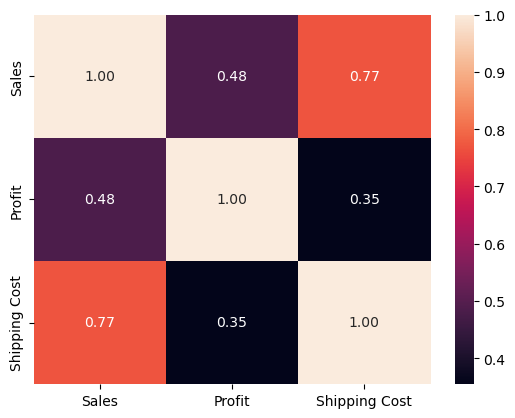

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df[['Sales', 'Profit', 'Shipping Cost']].corr()

# Generate a heatmap
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()


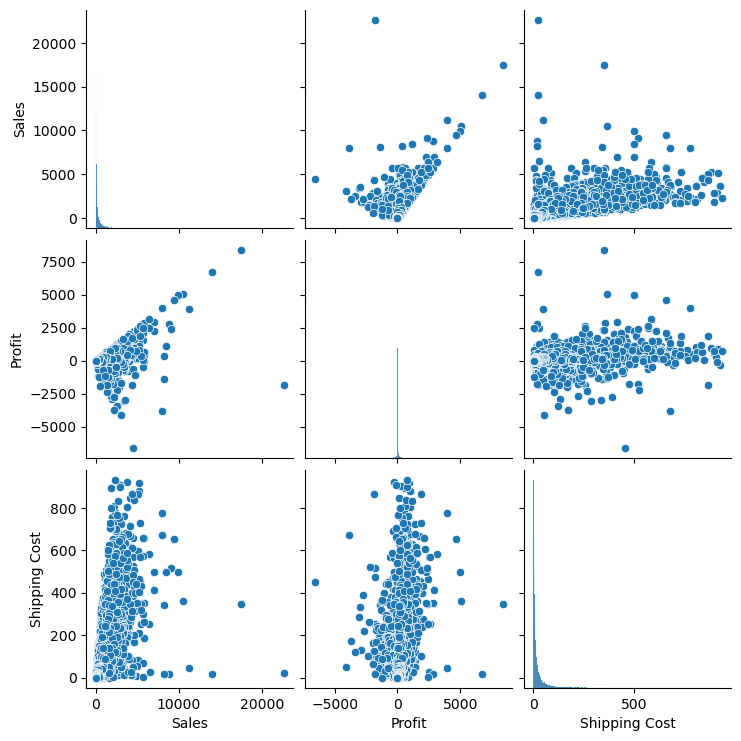

In [46]:
sns.pairplot(df[['Sales', 'Profit', 'Shipping Cost']])
plt.show()


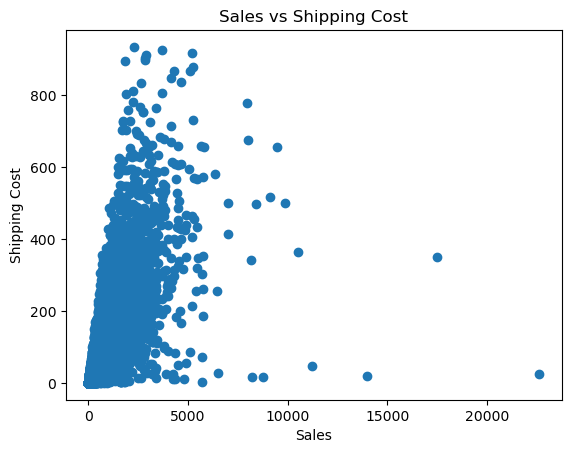

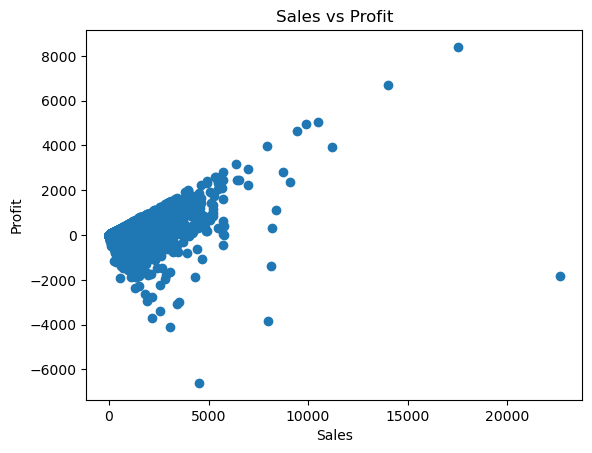

In [47]:
import matplotlib.pyplot as plt

plt.scatter(df['Sales'], df['Shipping Cost'])
plt.xlabel('Sales')
plt.ylabel('Shipping Cost')
plt.title('Sales vs Shipping Cost')
plt.show()

plt.scatter(df['Sales'], df['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit')
plt.show()


In [48]:
sales_outliers = df[df['Sales_Zscore'].abs() > 3]
profit_outliers = df[df['Profit_Zscore'].abs() > 3]
shipping_cost_outliers = df[df['Shipping Cost_Zscore'].abs() > 3]


In [49]:
# Find common outliers between Sales and Shipping Cost
common_sales_shipping = sales_outliers.index.intersection(shipping_cost_outliers.index)

# Find common outliers between Sales and Profit
common_sales_profit = sales_outliers.index.intersection(profit_outliers.index)


In [50]:
common_sales_shipping


Int64Index([  229,   305,   415,   821,   912,   913,   914,   968,  1068,
             1202,
            ...
            50464, 50597, 50688, 50741, 50742, 50971, 51021, 51022, 51118,
            51170],
           dtype='int64', length=576)

In [51]:
common_sales_profit

Int64Index([  105,   305,   306,   310,   397,   525,   781,   821,   912,
              913,
            ...
            49719, 50081, 50228, 50230, 50464, 50550, 50603, 50688, 51021,
            51022],
           dtype='int64', length=498)

In [52]:
print(sales_outliers.loc[common_sales_shipping, ['Segment', 'Country', 'Category']].value_counts())
print(sales_outliers.loc[common_sales_profit, ['Segment', 'Country', 'Category']].value_counts())


Segment      Country        Category       
Consumer     United States  Technology         25
Corporate    United States  Technology         19
Consumer     United States  Furniture          15
Corporate    United States  Office Supplies    13
Consumer     United States  Office Supplies    12
                                               ..
             Tanzania       Office Supplies     1
             Switzerland    Furniture           1
             Spain          Office Supplies     1
             South Korea    Furniture           1
Home Office  Zambia         Furniture           1
Length: 213, dtype: int64
Segment      Country        Category       
Consumer     United States  Technology         25
                            Office Supplies    18
Corporate    United States  Technology         17
Home Office  United States  Technology         13
Consumer     Germany        Technology         13
                                               ..
Corporate    Lesotho        Technolo

In [53]:
# Identify repetitive high-value transactions by Customer ID
repetitive_customers = df[df['Sales_Zscore'] > 3]['Customer ID'].value_counts()
print("Repetitive high-value customers:\n", repetitive_customers)


Repetitive high-value customers:
 GT-14710    6
FH-14365    5
PF-19120    5
CS-11845    5
GK-14620    5
           ..
DB-13660    1
DM-13525    1
AH-10075    1
AY-10555    1
MO-17800    1
Name: Customer ID, Length: 640, dtype: int64


In [54]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create a new column for the month
df['Order Month'] = df['Order Date'].dt.month

# Identify seasonal trends among high-sales outliers
seasonal_trends = df[df['Sales_Zscore'] > 3]['Order Month'].value_counts().sort_index()
print("Seasonal Trends:\n", seasonal_trends)


Seasonal Trends:
 1      71
2      55
3      78
4      64
5      86
6      84
7      65
8     104
9      99
10     86
11    113
12    115
Name: Order Month, dtype: int64


In [55]:
# Identify which 'Sub-Category' or 'Product ID' are most common among high-sales outliers
high_value_products = df[df['Sales_Zscore'] > 3]['Sub-Category'].value_counts()
print("High-Value Products:\n", high_value_products)


High-Value Products:
 Phones         201
Appliances     161
Bookcases      145
Copiers        126
Chairs         124
Tables         117
Machines        64
Accessories     31
Binders         25
Storage         20
Supplies         6
Name: Sub-Category, dtype: int64


In [57]:
# Find the average discount and shipping cost for high-sales outliers
avg_discount_high_sales = df[df['Sales_Zscore'] > 3]['Discount'].mean()
avg_shipping_high_sales = df[df['Sales_Zscore'] > 3]['Shipping Cost'].mean()

print(f"Average discount for high-sales outliers: {avg_discount_high_sales}")
print(f"Average shipping cost for high-sales outliers: {avg_shipping_high_sales}")


Average discount for high-sales outliers: 0.08397450980392157
Average shipping cost for high-sales outliers: 265.27383333333336


In [58]:
# INVENTORY MANAGEMENT

#Identify Fast-Moving Products
# Find most frequently sold products
fast_moving_products = df['Sub-Category'].value_counts()
print(f"Most Frequently Sold Products:\n{fast_moving_products}")


Most Frequently Sold Products:
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64


In [59]:
# Slow-moving products are simply the ones at the bottom of the same list
print(f"Slow-Moving Products:\n{fast_moving_products.tail()}")


Slow-Moving Products:
Bookcases     2411
Copiers       2223
Appliances    1755
Machines      1486
Tables         861
Name: Sub-Category, dtype: int64


In [60]:

# Grouping by Sub-Category and calculating the mean profit
avg_profit_by_category = df.groupby('Sub-Category')['Profit'].mean().sort_values(ascending=False)
print(f"Average Profit by Category:\n{avg_profit_by_category}")


Average Profit by Category:
Sub-Category
Copiers        116.314687
Appliances      80.729681
Bookcases       67.160688
Phones          64.556749
Accessories     42.154896
Chairs          40.884178
Machines        39.614989
Storage         21.439314
Paper           16.734789
Furnishings     14.816223
Envelopes       12.156516
Art             11.868505
Binders         11.776633
Supplies         9.312686
Labels           5.759982
Fasteners        4.762572
Tables         -74.429023
Name: Profit, dtype: float64


In [61]:
#SEASONAL STOCKING
# Seasonal trends among all sales, not just outliers
all_seasonal_trends = df['Order Month'].value_counts().sort_index()
print(f"All Seasonal Trends:\n{all_seasonal_trends}")


All Seasonal Trends:
1     3122
2     2927
3     3728
4     3499
5     3938
6     4892
7     3571
8     4715
9     5237
10    4467
11    5660
12    5534
Name: Order Month, dtype: int64


In [62]:
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Map the 'Order Month' column to its new string values
df['Order Month Name'] = df['Order Month'].map(month_map)



In [63]:
all_seasonal_trends = df['Order Month Name'].value_counts().sort_index()
print(f"All Seasonal Trends:\n{all_seasonal_trends}")


All Seasonal Trends:
Apr    3499
Aug    4715
Dec    5534
Feb    2927
Jan    3122
Jul    3571
Jun    4892
Mar    3728
May    3938
Nov    5660
Oct    4467
Sep    5237
Name: Order Month Name, dtype: int64


In [64]:
# Define the correct order for the months
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the index to a CategoricalIndex with ordered categories
all_seasonal_trends.index = pd.CategoricalIndex(all_seasonal_trends.index, categories=ordered_months, ordered=True)

# Sort the index
all_seasonal_trends = all_seasonal_trends.sort_index()

# Print the sorted series
print(f"All Seasonal Trends (sorted):\n{all_seasonal_trends}")


All Seasonal Trends (sorted):
Jan    3122
Feb    2927
Mar    3728
Apr    3499
May    3938
Jun    4892
Jul    3571
Aug    4715
Sep    5237
Oct    4467
Nov    5660
Dec    5534
Name: Order Month Name, dtype: int64


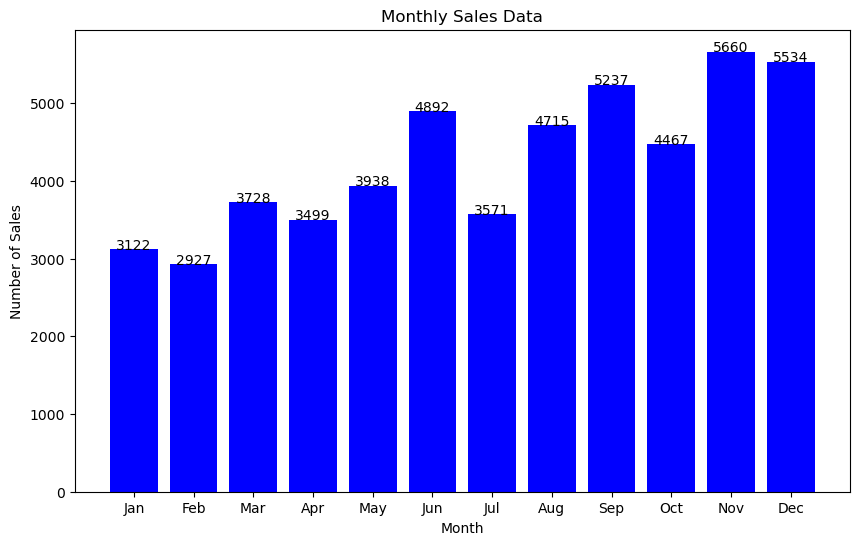

In [65]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(all_seasonal_trends.index, all_seasonal_trends.values, color='blue')

# Add titles and labels
plt.title("Monthly Sales Data")
plt.xlabel("Month")
plt.ylabel("Number of Sales")

# Add value labels on top of the bars
for i, value in enumerate(all_seasonal_trends.values):
    plt.text(i, value, str(value), ha='center')

# Show the plot
plt.show()


In [66]:
#Logistics Efficiency

In [67]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days
avg_delivery_time = df['Delivery Time'].mean()
print(avg_delivery_time)

5.079040748683954


In [68]:
#cost per unit shipped
df['Cost Per Unit Shipped'] = df['Shipping Cost'] / df['Quantity']
df['Cost Per Unit Shipped'].head()

0    17.730000
1     3.240000
2     2.042500
3     1.606667
4     0.940000
Name: Cost Per Unit Shipped, dtype: float64

In [69]:
# To find the highest cost per unit shipped
highest_cost_per_unit = df['Cost Per Unit Shipped'].max()
print(f"The highest cost per unit shipped is: {highest_cost_per_unit}")

# To find the lowest cost per unit shipped
lowest_cost_per_unit = df['Cost Per Unit Shipped'].min()
print(f"The lowest cost per unit shipped is: {lowest_cost_per_unit}")


The highest cost per unit shipped is: 363.87
The lowest cost per unit shipped is: 0.0


In [70]:
# Rows with the highest cost per unit shipped
highest_cost_rows = df[df['Cost Per Unit Shipped'] == highest_cost_per_unit]

# Rows with the lowest cost per unit shipped
lowest_cost_rows = df[df['Cost Per Unit Shipped'] == lowest_cost_per_unit]


In [71]:
highest_cost_rows


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Profit,Shipping Cost,Order Priority,Sales_Zscore,Profit_Zscore,Shipping Cost_Zscore,Order Month,Order Month Name,Delivery Time,Cost Per Unit Shipped
26552,33536,CA-2013-146633,2013-11-16,2013-11-18,Second Class,TG-21310,Toby Gnade,Consumer,Los Angeles,California,...,381.297,363.87,Critical,1.579909,2.022987,5.890335,11,Nov,2,363.87


In [72]:
lowest_cost_rows

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Profit,Shipping Cost,Order Priority,Sales_Zscore,Profit_Zscore,Shipping Cost_Zscore,Order Month,Order Month Name,Delivery Time,Cost Per Unit Shipped
28544,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,2.4,0.0,Medium,-0.477993,-0.150345,-0.460343,2,Feb,4,0.0
35859,6147,MX-2012-134460,2012-05-22,2012-05-26,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,1.8,0.0,High,-0.379667,-0.153786,-0.460343,5,May,4,0.0


In [121]:
bottleneck_modes = df[df['Delivery Time'] > avg_delivery_time]
bottleneck_modes

rows = len(bottleneck_modes.axes[0])  

print(rows)


18841


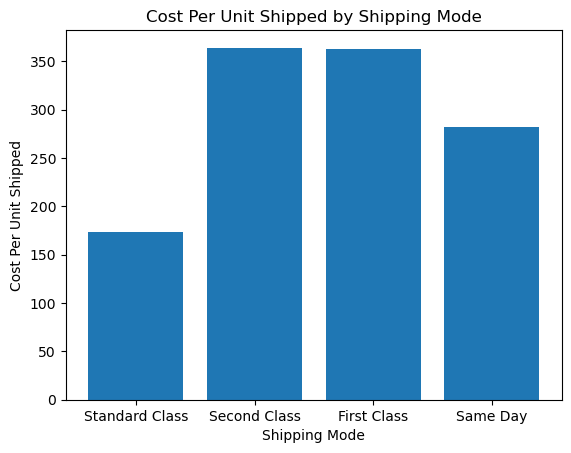

In [74]:
import matplotlib.pyplot as plt
plt.bar(df['Ship Mode'], df['Cost Per Unit Shipped'])
plt.title('Cost Per Unit Shipped by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Cost Per Unit Shipped')
plt.show()


In [75]:
import pandas as pd

# Assume df is your DataFrame
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Calculate Fulfillment Speed
df['Fulfillment Speed'] = (df['Ship Date'] - df['Order Date']).dt.days

# Calculate an Order Accuracy Score
# This is a mock-up example and may not be entirely accurate
df['Order Accuracy Score'] = df.apply(lambda x: 1 if x['Order Priority'] == 'High' and x['Fulfillment Speed'] <= 2 else 0, axis=1)

# Average Fulfillment Speed
avg_fulfillment_speed = df['Fulfillment Speed'].mean()

# Average Order Accuracy
avg_order_accuracy = df['Order Accuracy Score'].mean()

print(f"Average Fulfillment Speed: {avg_fulfillment_speed} days")
print(f"Average Order Accuracy: {avg_order_accuracy * 100}%")


Average Fulfillment Speed: 5.079040748683954 days
Average Order Accuracy: 11.969194774809905%


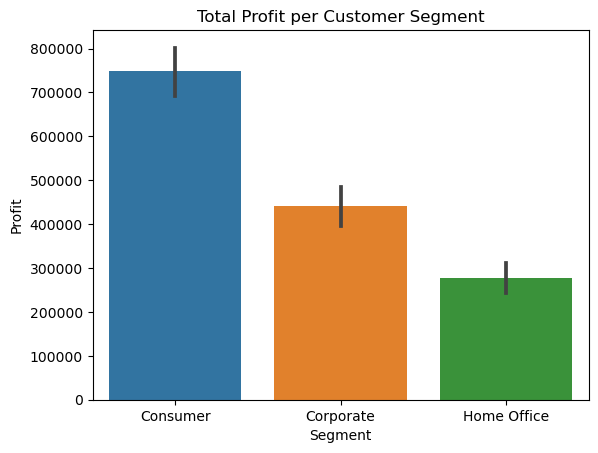

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Segment', y='Profit', data=df, estimator=sum)
plt.title('Total Profit per Customer Segment')
plt.show()


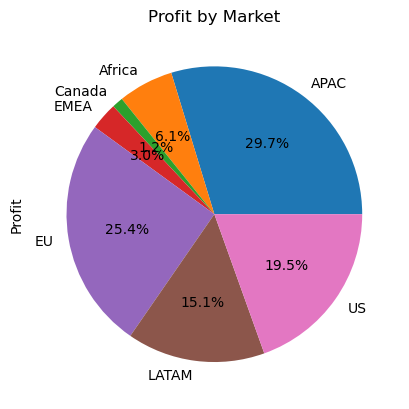

In [77]:
df.groupby('Market')['Profit'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Profit by Market')
plt.show()


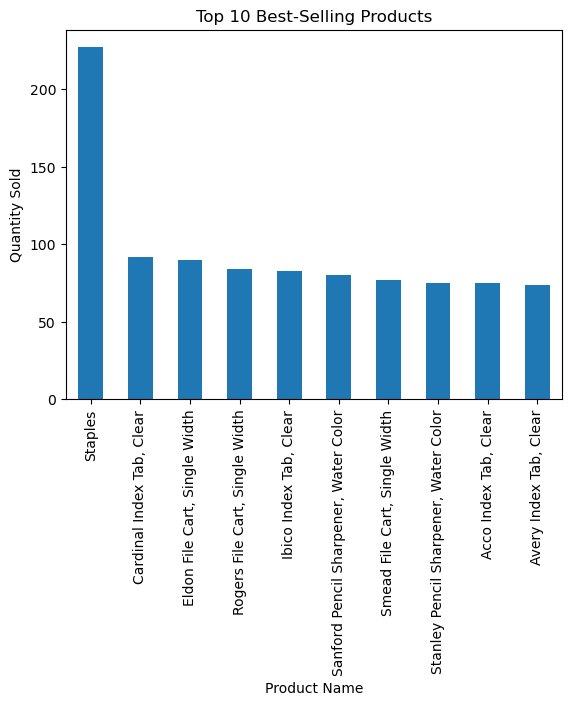

In [78]:
df['Product Name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.show()


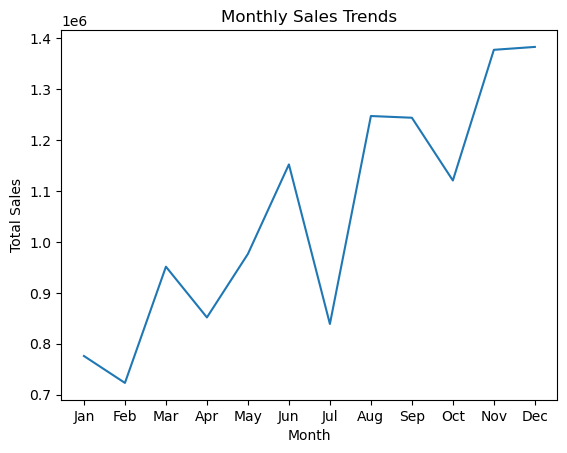

In [79]:
import matplotlib.pyplot as plt
import pandas as pd


# Grouping data by month and summing the sales
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby('Order Month')['Sales'].sum()

# Plotting
plt.plot(monthly_sales)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Changing the x-ticks labels to abbreviated month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)

plt.show()


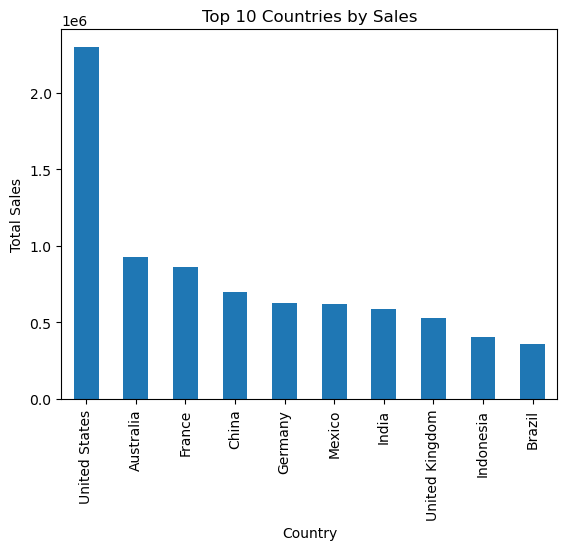

In [80]:
df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()


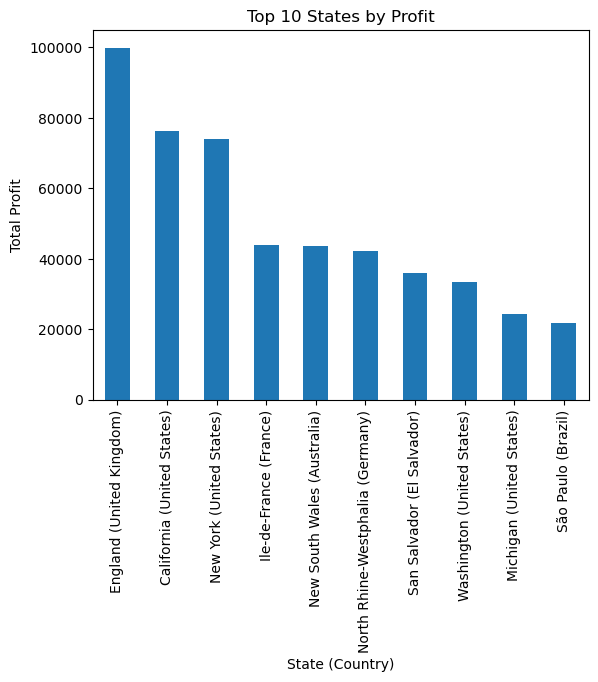

In [81]:

# Creating a new column that combines the 'State' and 'Country' columns
df['State_Country'] = df['State'] + " (" + df['Country'] + ")"

# Grouping data by this new column and summing the profit
state_country_profit = df.groupby('State_Country')['Profit'].sum().sort_values(ascending=False).head(10)

# Plotting
state_country_profit.plot(kind='bar')
plt.title('Top 10 States by Profit')
plt.xlabel('State (Country)')
plt.ylabel('Total Profit')

plt.show()
